## 準備

1. KaggleのTitanic Datasetは必要なのでダウンロードしてGoogle Driveに上げる。 \
https://www.kaggle.com/c/titanic/data よりダウンロードが可能(Kaggleアカウントが必要) \

以下を`drive/MyDrive/Kaggle` 下に配置する。
- gender_submission.csv
- train.csv
- test.csv

2. ドライブをマウントする。 \
左のフォルダのアイコンからやる。

3. ランタイムをGPUにする。

## 以下コード

### データの読み込み

In [1]:
# 必要なものをインストール
!pip install matplotlib==3.3.3
!pip install category_encoders
!pip install pytorch_tabnet

In [2]:
# データセットが入っているフォルダに移動
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [3]:
# 必要なライブラリをインストール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 学習データを読み込む
---write your code---

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# テストデータを読み込む
---write your code---

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 前処理

データがobject型のままではモデルが処理できないのでエンコーディングを行う。今回はLabel Encodingを用いる。 \

また、ニューラルネットワークでは欠損値をそのまま扱うことができないので補填する。今回は、欠損値は全体の平均値で補填してみる。

なお、trainとtestでラベルの相違があったら困るので一度全データを結合してからエンコーディングする。

In [ ]:
## trainとtestを結合する。
---write your code---

In [ ]:
# 欠損値を補填する。
null_columns = ['Age', 'Cabin']
---write your code---

In [ ]:
# object型のcolumnを定義する。(NameとTicketは種類が多すぎるので削除)
obj_columns = ['Sex', 'Cabin', 'Embarked']
# LabelEncodingを適用する(category_encodersではOrdinalEncoderという名前である。)
---write your code(2 rows)---
df_cat_oe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,3,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,1


## モデル構築

今回はTabnetを用いる。
Tabnetはテーブルデータに特化したディープラーニングモデルである。 \
詳しくは、[日本語解説記事](https://zenn.dev/sinchir0/articles/9228eccebfbf579bfdf4)を参照。 

Tabnetは事前学習を行うことで精度を向上させることができる。 \
実装は有志によって実装されたpytorch_tabnetを用いると楽である。

LightGBMと比較して、精度は同じかそれ以下である場合が多いが、注目する特徴量が異なるため、アンサンブルなどで有用である。



In [4]:
## df_cat_oeをtrainとtestに分離する。
---write your code(2 rows)---

NameError: ignored

In [ ]:
# 学習に用いない特徴を定義する。
drop_cols = ['PassengerId', 'Survived', 'Name', 'Ticket']
# 学習データを定義する。(X, y, X_test)
---write your code(3 rows)---

In [ ]:
from sklearn.model_selection import train_test_split
# 評価用データを作成する。一旦HoldOut法で行う。
---write your code---

In [ ]:
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch

# pretrainのパラメータを格納した辞書
pretrain_params = dict(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42
)

# pretrainモデルのインスタンスを定義
pretrainer = TabNetPretrainer(**pretrain_params)

# pretrainを実行
pretrainer.fit(X_train=X_train.values,
               eval_set=[X_val.values],
               pretraining_ratio=0.8)

Device used : cuda
epoch 0  | loss: 5.08025 | val_0_unsup_loss: 848.26587|  0:00:00s
epoch 1  | loss: 4.27773 | val_0_unsup_loss: 447.25229|  0:00:00s
epoch 2  | loss: 3.62009 | val_0_unsup_loss: 205.0238|  0:00:00s
epoch 3  | loss: 3.215   | val_0_unsup_loss: 33.37834|  0:00:00s
epoch 4  | loss: 2.89928 | val_0_unsup_loss: 16.67972|  0:00:00s
epoch 5  | loss: 2.77489 | val_0_unsup_loss: 10.65199|  0:00:00s
epoch 6  | loss: 2.5237  | val_0_unsup_loss: 6.95617 |  0:00:00s
epoch 7  | loss: 2.34272 | val_0_unsup_loss: 5.40793 |  0:00:00s
epoch 8  | loss: 2.29706 | val_0_unsup_loss: 4.59618 |  0:00:00s
epoch 9  | loss: 2.10731 | val_0_unsup_loss: 4.69526 |  0:00:00s
epoch 10 | loss: 2.13318 | val_0_unsup_loss: 4.44383 |  0:00:01s
epoch 11 | loss: 2.12276 | val_0_unsup_loss: 3.3657  |  0:00:01s
epoch 12 | loss: 2.10679 | val_0_unsup_loss: 2.97856 |  0:00:01s
epoch 13 | loss: 2.13113 | val_0_unsup_loss: 3.61371 |  0:00:01s
epoch 14 | loss: 2.08912 | val_0_unsup_loss: 3.99461 |  0:00:01s
epoc

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
# 学習を行う。
# 学習時のparam
tabnet_params = dict(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42,
    verbose=10,
)

# TabNet分類器のparamを定義
model = ---(**tabnet_params)

# 学習
model.---(X_train=---,
          y_train=---,
          eval_set=[(X_val.values, y_val)],
          eval_metric=['logloss', 'accuracy'],
          max_epochs=1000,
          patience=100,
          from_unsupervised=pretrainer)

Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 1.26463 | val_0_logloss: 1.20036 | val_0_accuracy: 0.58659 |  0:00:00s
epoch 10 | loss: 0.47091 | val_0_logloss: 0.67019 | val_0_accuracy: 0.65363 |  0:00:00s
epoch 20 | loss: 0.41956 | val_0_logloss: 0.62579 | val_0_accuracy: 0.68715 |  0:00:01s
epoch 30 | loss: 0.39346 | val_0_logloss: 0.58573 | val_0_accuracy: 0.72067 |  0:00:02s
epoch 40 | loss: 0.36125 | val_0_logloss: 0.54105 | val_0_accuracy: 0.75419 |  0:00:02s
epoch 50 | loss: 0.34285 | val_0_logloss: 0.56271 | val_0_accuracy: 0.72626 |  0:00:03s
epoch 60 | loss: 0.3365  | val_0_logloss: 0.55738 | val_0_accuracy: 0.74302 |  0:00:04s
epoch 70 | loss: 0.32048 | val_0_logloss: 0.55677 | val_0_accuracy: 0.72067 |  0:00:04s
epoch 80 | loss: 0.30643 | val_0_logloss: 0.60907 | val_0_accuracy: 0.74302 |  0:00:05s
epoch 90 | loss: 0.3172  | val_0_logloss: 0.56284 | val_0_accuracy: 0.75978 |  0:00:05s
epoch 100| loss: 0.31135 | val_0_logloss: 0.47103 | val

<BarContainer object of 9 artists>

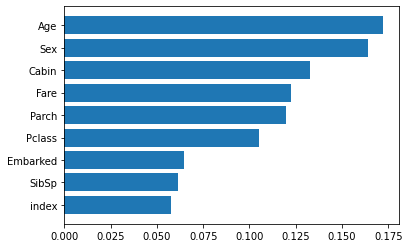

In [ ]:
# 重要度を描画
sort_index = np.argsort(model.feature_importances_)
plt.barh(X_train.columns[sort_index], model.feature_importances_[sort_index])

### valデータの評価

In [ ]:
from sklearn.metrics import accuracy_score
# valデータを予測する。(float型なのでint型に変更する。)
val_preds = model.predict(X_val.values).astype(int)
print(val_preds)

[0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0]


TabnetはLightGBMやニューラルネットと違い、最初から、0, 1の二値で出力してくれる。(ただし、float型なので提出時にはint型に変換しよう。) \
もし、確率で出力したいのであれば、`predict_proba`を使おう。

Accuracyスコアで精度を計算する。

In [ ]:
from sklearn.metrics import accuracy_score
# スコアを出力
---write your code---

0.8324022346368715


### テストデータの予測とKaggleへの提出ファイルの作成。

In [ ]:
# valデータと同じように予測
---write your code---

In [ ]:
# 提出 (パス名は submit/my_submit8)
---write your code(3 rows)---

### Cross Validationを作ろう

今回も、1から実装する。 \
なお、pretrainはtrainデータ全てで行うとする。

In [ ]:
# 事前学習を行う。
pretrain_params = dict(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42
)

pretrainer = ---(**pretrain_params)

pretrainer.fit(X_train=---,
               eval_set=[---],
               pretraining_ratio=0.8)

Device used : cuda
epoch 0  | loss: 4.98667 | val_0_unsup_loss: 348.935 |  0:00:00s
epoch 1  | loss: 3.94347 | val_0_unsup_loss: 189.28311|  0:00:00s
epoch 2  | loss: 3.50854 | val_0_unsup_loss: 82.95325|  0:00:00s
epoch 3  | loss: 3.15745 | val_0_unsup_loss: 52.64265|  0:00:00s
epoch 4  | loss: 2.92252 | val_0_unsup_loss: 21.81833|  0:00:00s
epoch 5  | loss: 2.72176 | val_0_unsup_loss: 11.25874|  0:00:00s
epoch 6  | loss: 2.5229  | val_0_unsup_loss: 9.2108  |  0:00:00s
epoch 7  | loss: 2.46383 | val_0_unsup_loss: 8.16654 |  0:00:00s
epoch 8  | loss: 2.38874 | val_0_unsup_loss: 6.56245 |  0:00:01s
epoch 9  | loss: 2.19649 | val_0_unsup_loss: 5.31507 |  0:00:01s
epoch 10 | loss: 2.15035 | val_0_unsup_loss: 4.73807 |  0:00:01s
epoch 11 | loss: 2.11824 | val_0_unsup_loss: 4.45958 |  0:00:01s
epoch 12 | loss: 2.05205 | val_0_unsup_loss: 5.25225 |  0:00:01s
epoch 13 | loss: 2.04942 | val_0_unsup_loss: 6.55164 |  0:00:01s
epoch 14 | loss: 2.00438 | val_0_unsup_loss: 7.50772 |  0:00:01s
epoch

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 学習時のパタメータ
tabnet_params = dict(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42,
    verbose=0,
)

---write your code(lots of rows)---

epoch1
Loading weights from unsupervised pretraining

Early stopping occurred at epoch 403 with best_epoch = 303 and best_val_0_accuracy = 0.84358
Best weights from best epoch are automatically used!
0.8435754189944135
----------------------------------------
epoch2
Loading weights from unsupervised pretraining

Early stopping occurred at epoch 468 with best_epoch = 368 and best_val_0_accuracy = 0.84831
Best weights from best epoch are automatically used!
0.848314606741573
----------------------------------------
epoch3
Loading weights from unsupervised pretraining

Early stopping occurred at epoch 116 with best_epoch = 16 and best_val_0_accuracy = 0.72472
Best weights from best epoch are automatically used!
0.7247191011235955
----------------------------------------
epoch4
Loading weights from unsupervised pretraining

Early stopping occurred at epoch 132 with best_epoch = 32 and best_val_0_accuracy = 0.73034
Best weights from best epoch are automatically used!
0.7303370786516854
----

In [ ]:
# submissionのサンプルファイルを読み込む
submit = pd.read_csv('gender_submission.csv')
submit['Survived'] = test_preds
# 提出
submit.to_csv('submit/my_submit8.csv', index=False)

## 参考サイト
- Tabnet公式ドキュメント : https://dreamquark-ai.github.io/tabnet/
- Tabnetの日本語解説記事 : https://zenn.dev/sinchir0/articles/9228eccebfbf579bfdf4